# 목차
- 몇몇 잘 알려진 기법들에 대해서 이야기 예정
- 단순하게 설명보다는 각 기법 별로 논문 기반으로 원리를 설명 예정
- 논문 따로 안 읽으셔도 되고 영어 Prompt 이해 안 되시더라도 구두로 해석 예정이니 학습에 무방함

### 목차
1. 기법들에 대한 설명
  - 시작하기 좋은 포인트
  - 어떤 원리로 워킹하는 지를 이해
3. 주요 기법들 소개
  1. Few-Shot
  2. Chain-of-Thought
4. 주요 기법들을 응용한 케이스들 소개
  1. Self-Consistency
  2. Generated Knowledge
  3. Least-to-Most
  4. Prompt Chaining
  5. ReAct

### 들어가기 전에: Zero-Shot Prompting?

- Zero-Shot이란 추가적인 학습이나 예시/시연 없이 바로 답변 출력을 유도하는 법
  - ChatGPT 전에는 어떤 태스크 진행을 위해서는 데이터 학습이 필요했음
  - 그러나 ChatGPT 3.5, GPT-4, Claude 3 같은 LLM은 추가 학습이나 예시가 없어도 어느 정도 잘 답변하는 편
  - 2022년 ChatGPT 출시 이후 2024년 기준 ChatGPT한테 바로 질문하는 것은 자연스러운 행위

### 기법들 설명
- 대표적으로는 Few Shot 그리고 Chain of Thought 이렇게 2가지 기법들이 존재함
- 그 외에도 많이 있는데, 대부분이 Chain of Thought를 기반으로 발전한 기법들

- LLM처럼 특정 Prompt 방법론이 다른 방법론보다 무조건 더 우위에 있고 그런 경향은 없음
  - GPT-4가 GPT 3.5 대비 모든 지표에서 더 좋음 (물론 비용, 속도 제외)
  - 특정 Prompt 기법 A가 보편적으로 기법 B보다 좋은 케이스는 거의 존재하지 않음
- 따라서 각 Prompt Engineering 기법의 원리를 잘 이해하고 유즈케이스를 잘 판단하는게 매우 중요함

### 주요 기법들 소개

### 1. Few-Shot
  - 참고 할 수 있는 정답 사례들을 Prompt에 추가하여 성능을 높이는 방법
  - Language Models are Few-Shot Learners 논문 (NeurIPS 2020, OpenAI)
    - 논문: https://arxiv.org/abs/2005.14165 (=GPT-3 논문)




  - Few Shot 의미
    - 5-shot의 경우 참고 할 정답 사례들을 Prompt에 5개를 입력해줬다는 뜻
    - LLM 평가지표 보면 MMLU(5-shot) 이렇게 적혀있는게 바로 Few-Shot을 적용했다는 뜻
    - 평가에서도 사용될만큼 공인된 Prompt Engineering 방법론
      - OpenAI에서 GPT-4 벤치마크 할 때 모든 Prompt에 Few-Shot 적용했음
- 특징은 모델 사이즈가 어느 정도 커야한다는 점

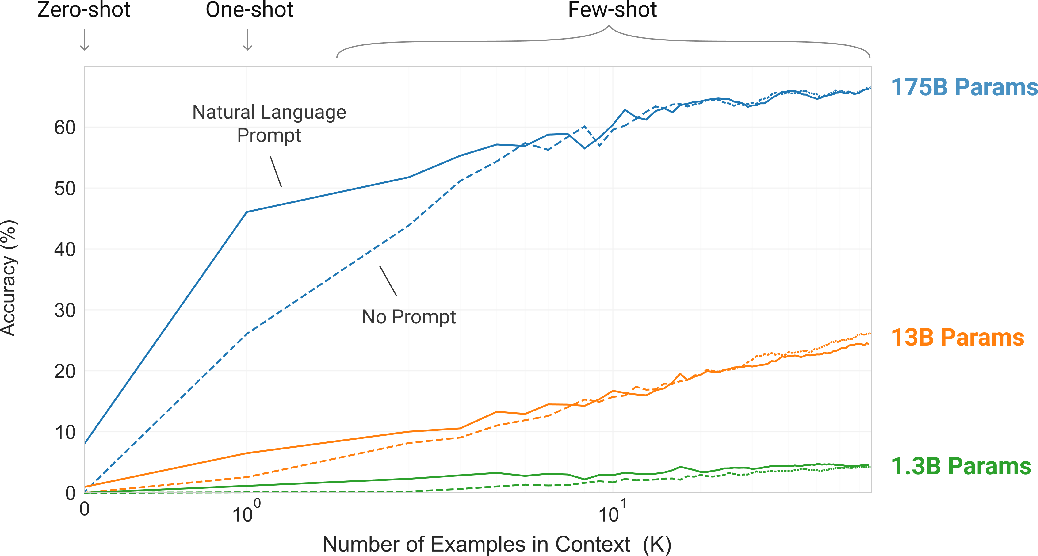

#### Few-Shot이 잘 워킹하는 이유
- 모델의 파라미터를 수정하지 않고 (즉, 추가적인 학습을 하지 않고) 단순하게 Prompt에 예시 정답만 추가해도 성능이 급격하게 증가하는 것을 발견
- Pretraining, 즉 사전훈련 단계에서 언어 모델이 패턴을 인지하는 능력을 발달
- 이러한 능력으로 추론 시에 태스크에 빠르게 적응을 합니다.
- 이렇게 따로 학습을 하지 않고도 언어 모델이 Prompt을 읽으면서 이해해나가는 과정을 "In-Context Learning"이라고 불믐

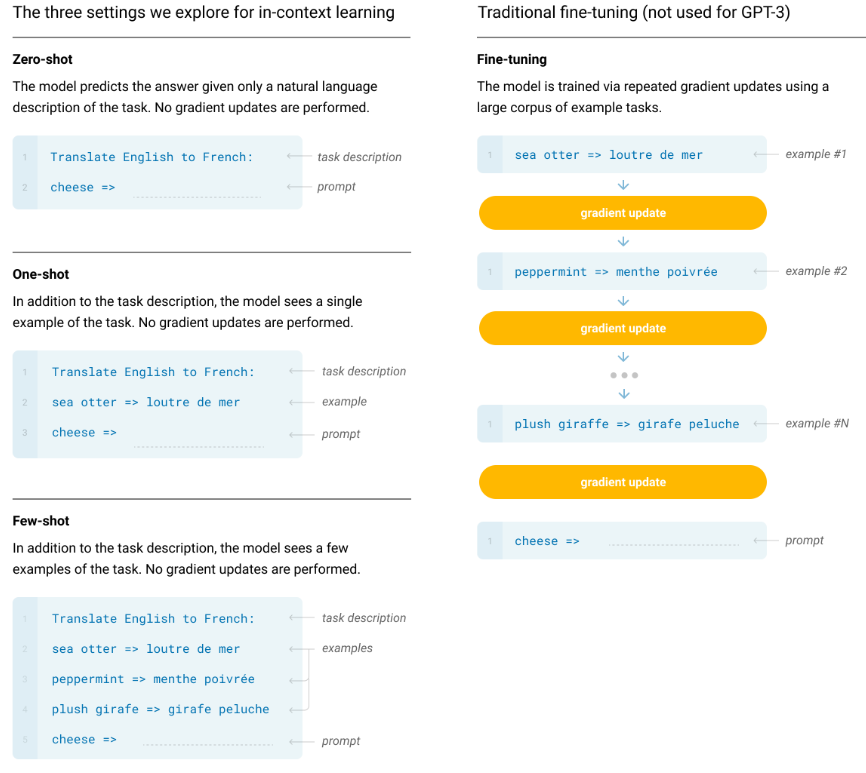

#### 이해를 돕기 위한 토막 지식: Pretraining
기본적으로 모든 LLM은 아래와 같은 학습 과정을 거침
1. Pretraining
  - 기본적인 언어 능력을 탑재하는 단계
  - 엄청나게 많은 텍스트를 쭉 읽고 학습하는 과정
  - 모델 성능에 가장 많이 영향을 끼치는 단계
  - 큰 모델들은 Pretraining만 거쳐도 일반적인 태스크 수행이 가능
2. Supervised Fine-tuning (SFT)
  - 태스크에 맞춰서 추가로 학습하는 단계
  - 보통 입력과 정답 쌍이 있어 이 쌍을 학습하는 과정
3. Human Alignment Training (ex. RLHF, DPO, ORPO)
  - 사람이 선호하는 답변이 무엇인지 학습하는 단계
  - 방법은 여러 가지가 있는데 가장 단순하게는 좋은 답변 A, 좋지 않은 답변 B 쌍을 두고 학습하는 과정

### few-shot 실습

In [1]:
!pip install openai --quiet

In [5]:
import OPENAI_API_KEY

from openai import OpenAI
client = OpenAI(
    api_key=OPENAI_API_KEY
)

ModuleNotFoundError: No module named 'OPENAI_API_KEY'

#### Few-Shot 예시
- LLaMA1 논문 Figure 3 (https://arxiv.org/pdf/2302.13971.pdf)

In [ ]:
prompt = """Q: Who wrote the book the origin of species?
"""

In [ ]:
completion = client.chat.completions.create(
    model = 'gpt-3.5-turbo',
    messages = [{'role: user', 'content': prompt}],
    temperature = 0.0
)

print(completion.choices[0].message.content)

SyntaxError: invalid syntax (418877444.py, line 3)

In [ ]:
prompt = """Answer these questions:
Q: Who sang who wants to be a millionaire in high society?
A: Frank Sinatra
Q: Who wrote the book the origin of species?
A: """

### Few-Shot 장단점

- 말 그대로 정답 예시만 넣어주면 되기 때문에 정답이 존재하는 모든 케이스에 적용이 가능함!
  - Prompt 길이가 길어 질 수 있는데 속도와 특히 비용에 영향이 존재
    - 정답 예시가 굉장히 긴 경우

### 2. Chain-of-Thought
  - Chain-of-Thought Prompting Elicits Reasoning in Large Language Models (NeurIPS 2022, Google)
    - 논문: https://arxiv.org/abs/2201.11903
  - Few Shot이 참고 할 수 있는 정답 사례들을 Prompt에 추가하여 성능을 높이는 방법이라면 Chain of Thought는 거기에 추가로 문제 해결 과정도 같이 Prompt에 추가하는 방식
  - 대부분의 Prompt Engineering 기법은 Chain-of-Thought의 후속작

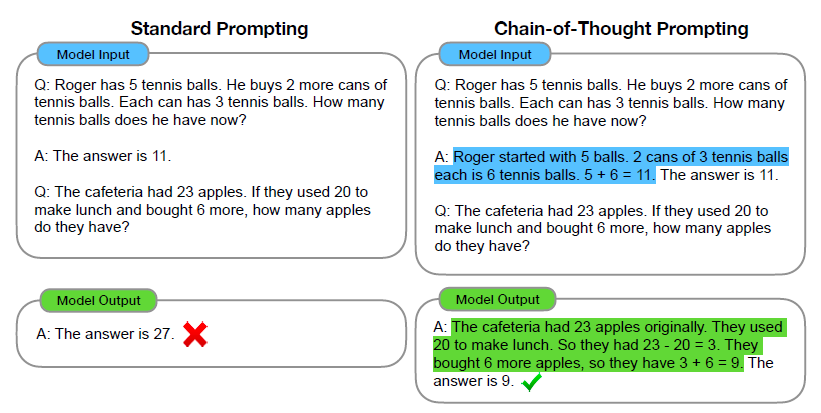

- 안타깝게도 Chain-of-Thought 논문에 있는 모든 예시들은 gpt-3.5-turbo-0125로는 재현되지 않음
- CoT 없이 못 푸는 문제들 없이 이미 다 잘 해결함
  - 따라서 예시를 입력하는 것보다는 원리를 잘 이해하는게 중요

In [ ]:
# Prompt 출처: https://github.com/microsoft/generative-ai-for-beginners/tree/main/05-advanced-prompts


prompt = """Lisa has 7 apples, throws 1 apples, gives 4 to Bart and Bart gives one back, how many apples does Lisa have?
7 - 1 = 6
6 - 4 = 2
2 + 1 = 3


# prompt = """Alice has 5 apples, throws 3 apples, gives 2 to Bob and Bob gives one back, how many apples does Alice have?"""


completion = client.chat.completions.create(
    model = 'gpt-3.5-turbo',
    messages = [{'role: user', 'content': prompt}],
    temperature = 0.0
)

print(completion.choices[0].message.content)

## 주요 기법들을 응용한 케이스들 소개
- Self-Consistency
  - CoT 한 번이 아니라 여러 번의 다양한 CoT 과정을 거쳐 그 중 베스트를 선정하는 방법
  - Self-Consistency Improves Chain of Thought Reasoning in Language Models (2022)
    - 논문: https://arxiv.org/pdf/2203.11171.pdf
  - 한 수 더 떠서 더 다양하게 그리고 각 CoT 과정들을 연결한 Tree of Thought 논문도 존재
- Generated Knowledge
  - 질문을 통해 상식을 끄집어내어 더 정확하게 대답하는 방법
  - Generated Knowledge Prompting for Commonsense Reasoning (2022)
    - 논문: https://arxiv.org/pdf/2110.08387.pdf
  - 해당 상식을 어느 정도 알고 있다는 전제 하에 워킹할만한 방법
  - Retrieval Augmented Generation(RAG)은 상식을 직접 주입하는 방법
    - 별도의 RAG 로직이 필요하지만 이게 실제로 많이 활용되는 방법
- Least-to-Most
  - 질문 A를 바로 물어보지 않고 질문 a, b로 쪼개서 물어보는 분할 정복 방법
  - Least-to-Most Prompting Enables Complex Reasoning in Large Language Models (2022)
    - 논문: https://arxiv.org/pdf/2205.10625
  - 비용 증가로 이어지긴 하나 상대적으로 사용하기 쉬운 방법
- Prompt Chaining
  - Prompt A의 Output A를 Prompt B에 사용하는 방법
  - 주로 전처리 또는 답변을 하기 쉽게 만드는 Prompt A와 실제 답변을 유도하는 Prompt B로 구성
  - Least-to-Most처럼 분할 정복 계열
- ReAct
  - Chain-of-Thought에서 Reasoning 과정을 추가한다면 여기서는 Reasoning 외에도 Action까지 추가하는 방법
  - 실제로 환경과 interact 해야하는 상황을 가정한 방법론
  - ReAct: Synergizing Reasoning and Acting in Language Models (2022)
    - 논문: https://arxiv.org/abs/2210.03629

-----

실용적인 방법론이 많진 않지만, CoT 논문 이후로 여러 다양한 방법론을 찾기 위한 많은 연구 결과물들
- 실용적이지 않은 이유에는 Input 토큰이 몇 배씩 증가하여 비용 이슈로 이어질 수 있기 때문

### Self-Consistency
- 실제로 쓰기엔 좀 애매함. 출력값 Voting 앙상블인데 사실 대부분의 머신러닝 케이스에서 앙상블은 효율은 안 좋은 편 (순수하게 성능 향상은 꽤 좋은 편)
  - 앙상블(Ensemble) = 2개 이상의 모델 또는 모델 출력값을 합쳐 성능을 높이는 방법

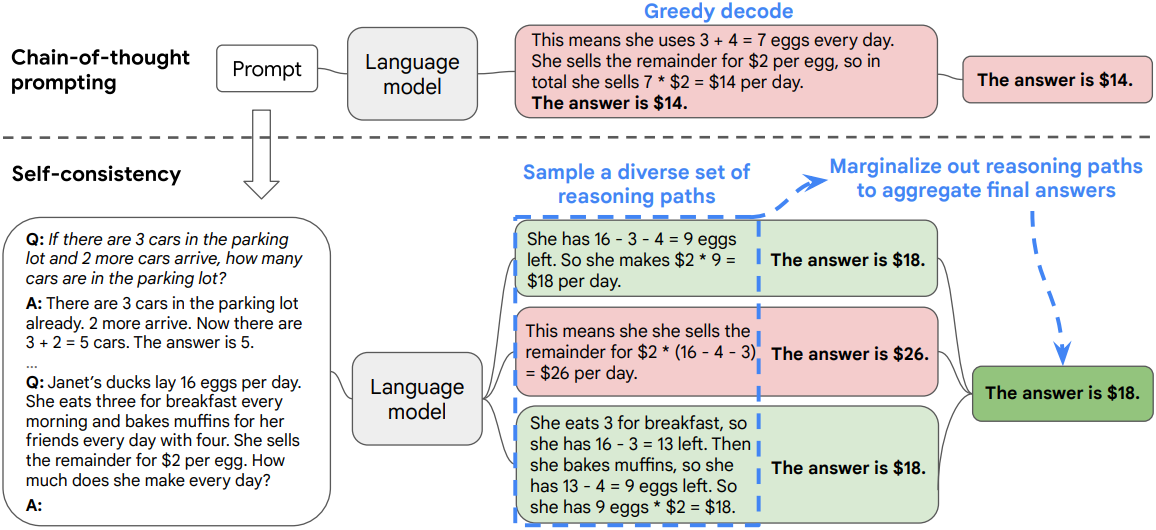

## 정리
- 우리가 ChatGPT한테 Naive하게 바로 질문하는 방법은 "Zero-Shot Prompting"으로 간주됨
- Zero-Shot보다 더 좋은 방법론은 대표적으로 Few Shot, Chain-of-Thought
  - Few-Shot은 Prompt에 예시 정답을 추가, Chain-of-Thought는 여기에 추가적으로 정답 추리 과정까지 넣어주는 방법
- 그 외에도 다른 방법들이 존재하면 대부분 위 두 방법론을 응용한 케이스들
- 위에 언급한 논문들은 한 번씩 가볍게 읽어보시는 것을 추천
  - 정독보다는 기존 방법론을 어떻게 개선하려 했는지 포인트만 이해하는 것을 권장